In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles

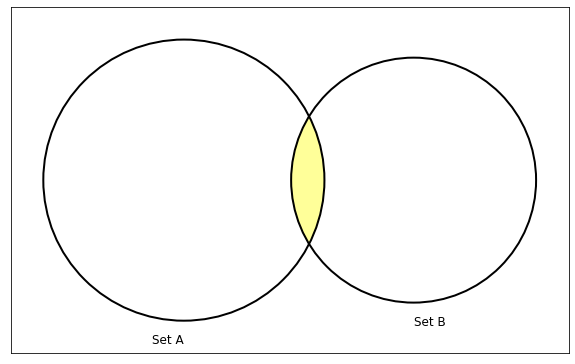

In [2]:
# 교집합
fig = plt.figure()
fig.set_size_inches(10,8)

Num_Set_A = 103
Num_Set_B = 77
Num_Set_A_and_B = 5

v = venn2(subsets={'10': Num_Set_A, '01': Num_Set_B, '11': Num_Set_A_and_B}, set_labels=('A','B'))
c = venn2_circles(subsets=(Num_Set_A, Num_Set_B, Num_Set_A_and_B), linestyle='solid')
v.get_patch_by_id('10').set_alpha(0.8)

v.get_patch_by_id('10').set_color('w') 
v.get_patch_by_id('01').set_color('w') 
v.get_patch_by_id('11').set_color('yellow') 

v.get_label_by_id('10').set_text(' ') 
v.get_label_by_id('01').set_text(' ') 
v.get_label_by_id('11').set_text(' ') 

v.get_label_by_id('A').set_text('Set A') 
v.get_label_by_id('B').set_text('Set B') 
plt.gca().set_facecolor("white")
plt.gca().set_axis_on()


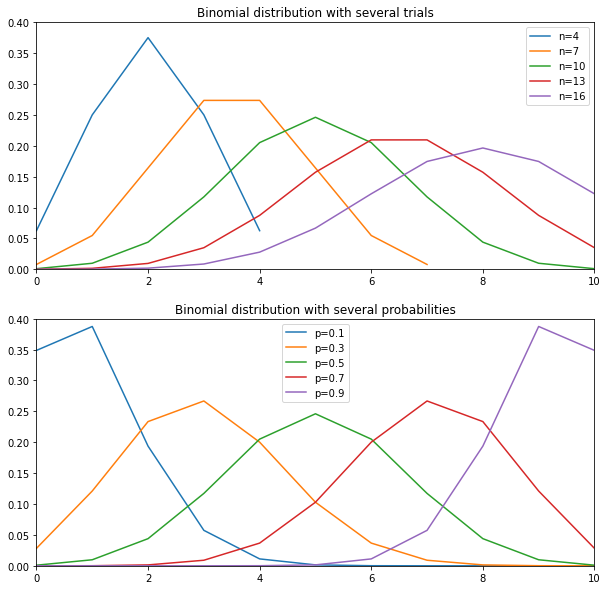

In [4]:
# 이항 분포 그림
import math
import matplotlib.pyplot as plt
from functools import reduce
import operator as op

n = 10 # 횟수
p = 0.5 # 성공할 확률

# 좌표 설정
plot_x_range = n
plot_y_range = 0.4

# 조합
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

# 이항 분포 함수
def p_X(x,n,p):
    return (ncr(n, x))*(p**x)*((1-p)**(n-x))

# X값
X = [x for x in range(n+1)]

# 그래프 그리기
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2, 1, 1)
plt.xlim(0, plot_x_range)
plt.ylim(0, plot_y_range)
plt.title("Binomial distribution with several trials")

ax2 = plt.subplot(2, 1, 2)
plt.xlim(0, plot_x_range)
plt.ylim(0, plot_y_range)
plt.title("Binomial distribution with several probabilities")

for different_n in [4+3*i for i in range(5)]:
    different_X = [x for x in range(different_n+1)]
    b_y = [p_X(x, different_n, p) for x in different_X]
    ax1.plot(different_X, b_y, label='n='+str(different_n))
    
for different_p in [(1+2*i)/10 for i in range(5)]:
    b_y = [p_X(x,n,different_p) for x in X]
    ax2.plot(X, b_y, label='p='+str(different_p))
    
ax1.legend(loc="best")
ax2.legend(loc="best")


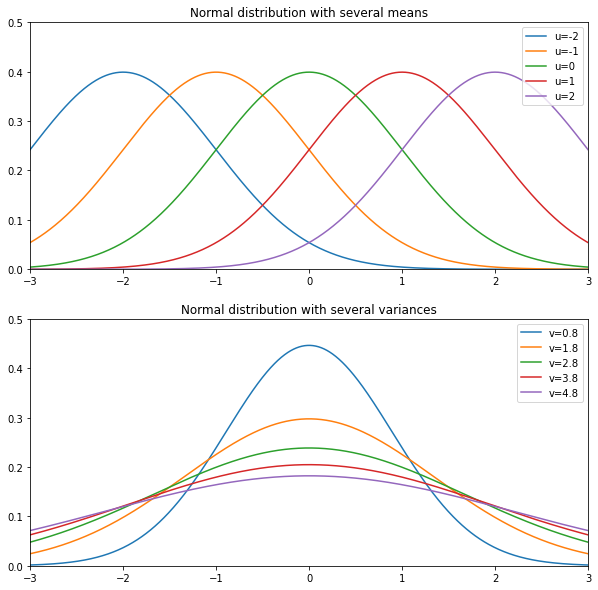

In [6]:
# 정규 분포 그림
import math
import matplotlib.pyplot as plt

u = 0 # 평균
v = 1 # 분산

# 좌표 설정
n = 1000
plot_x_range = 3
plot_y_range = 0.5

# 정규 분포 함수
def f_X(x,u,v):
    return 1/(math.sqrt(2 * math.pi * v)) * math.exp(-(x-u)**2 / (2*v))

# X값
X = [-plot_x_range + 2 * plot_x_range * x/n for x in range(n+1)]

# 그래프 그리기
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2, 1, 1)
plt.xlim(-plot_x_range, plot_x_range)
plt.ylim(0, plot_y_range)
plt.title("Normal distribution with several means")

ax2 = plt.subplot(2, 1 ,2)
plt.xlim(-plot_x_range, plot_x_range)
plt.ylim(0,plot_y_range)
plt.title("Normal distribution with several variances")

for shifted_u in range(-2,3):
    n_y = [f_X(x, shifted_u, v) for x in X]
    ax1.plot(X, n_y, label='u='+str(shifted_u))
    
for different_v in [(8+10*i)/10 for i in range(5)]:
    n_y = [f_X(x, u, different_v) for x in X]
    ax2.plot(X, n_y, label='v='+str(different_v))
    
ax1.legend(loc="best")
ax2.legend(loc="best")
plt.show()

In [ ]:
# 이항 분포와 정규 분포의 관계

import matplotlib.pyplot as plt
from functools import reduce
import operator as op
import math

# 조합
def ncr(n,r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

# 이항 분포 함수
def p_X(x,n,p):
    return (ncr(n,x))*(p**x)*((1-p))**(n-x)
    
# 정규 분포 함수
def f_X(x,u,v):
    return 1 / (math.sqrt(2*math.pi*v))*math.exp(-x(x-u)**2/(2*v))

# 그래프 그리기
plt.figure(figsize=(10,20))
ax1 = plt.subplot(3, 1, 1)
plt.title("Binomial")
plt.xlim(0,25)
plt.ylim(0,0.35)

ax2 = plt.subplot(3, 1, 2)
plt.title("Normal")
plt.xlim(0,25)
plt.ylim(0,0.35)

X = [x for x in range(n)]

for i in range(1, 10):
    
    # 이항 분포 파라미터
    n = 10*i
    p = 1/8
    
    # 정규 분포 파라미터
    u = n*p
    v = n*p*(1-p)

    # 그래프
    b_y = [p_X(t, n, p) for t in X]
    n_y = [f_X(t, u, v) for t in X]

    ax1.plot(X, b_y, label='n='+str(n))
    ax2.plot(X, n_y, label='n='+str(n))

ax1.legend()
ax2.legend()
plt.show()